# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [388]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = study_results.merge(mouse_metadata, how = "left",on = "Mouse ID")
# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [389]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()
# combined_df

249

In [390]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [391]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedID = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicatedID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [392]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_drop = combined_df.drop(duplicatedID.index)
combined_drop.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [393]:
# Checking the number of mice in the clean DataFrame.
combined_drop["Mouse ID"].nunique()

248

## Summary Statistics

In [394]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugRegimen_grp = combined_drop.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_tumor = pd.DataFrame()
summary_tumor["Mean Tumor Volume"] = drugRegimen_grp["Tumor Volume (mm3)"].mean()
summary_tumor["Median Tumor Volume"] = drugRegimen_grp["Tumor Volume (mm3)"].median()
summary_tumor["Tumor Volume Variance"] = drugRegimen_grp["Tumor Volume (mm3)"].var()
summary_tumor["Tumor Volume Std. Dev."] = drugRegimen_grp["Tumor Volume (mm3)"].std()
summary_tumor["Tumor Volume Std. Err."] = drugRegimen_grp["Tumor Volume (mm3)"].sem()
summary_tumor


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [395]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drugRegimen_grp.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

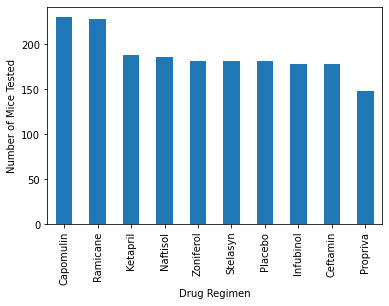

In [396]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_tested = drugRegimen_grp["Mouse ID"].count().sort_values(ascending=False)
pandas_bar = mice_tested.plot(kind = "bar")
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("Number of Mice Tested")

plt.show()

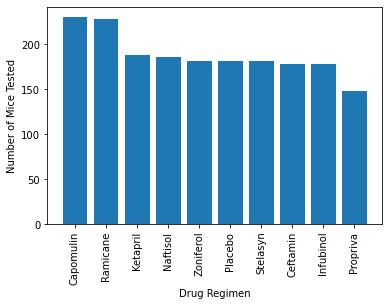

In [397]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(mice_tested))
plt.bar(x_axis, mice_tested, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol",
                            "Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"],
                            rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

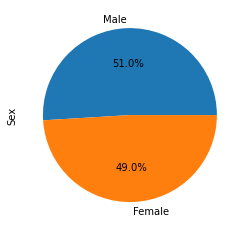

In [398]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_grp = combined_drop.groupby(["Sex"])
gender_grp["Sex"].count().sort_values(ascending=False).plot(kind = "pie", y="Sex",autopct='%1.1f%%')
plt.show()

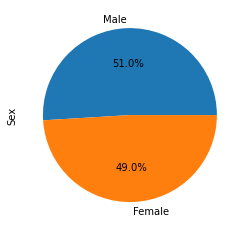

In [399]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = gender_grp["Sex"].count().sort_values(ascending=False)
labels = ["Male","Female"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [400]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grp = combined_drop.groupby(["Mouse ID"])
last_timepoint = mouse_grp["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint,combined_drop, on = ["Mouse ID","Timepoint"],how = "left")[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
final_tumor_volume = final_tumor_volume.loc[(final_tumor_volume["Drug Regimen"] == "Capomulin")|
                                            (final_tumor_volume["Drug Regimen"] == "Ramicane")|
                                            (final_tumor_volume["Drug Regimen"] == "Infubinol")|
                                            (final_tumor_volume["Drug Regimen"] == "Ceftamin")]

In [401]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_list = []
Ramicane_list = []
Infubinol_list = []
Ceftamin_list = []
volume_dict = {0: Capomulin_list,
                1: Ramicane_list,
                2:Infubinol_list,
                3: Ceftamin_list}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(treatments)):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume_dict[i] = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatments[i]]["Tumor Volume (mm3)"]
    
    # add subset 
    quartiles = volume_dict[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    bool_series = volume_dict[i].loc[(volume_dict[i]>upper_bound) | (volume_dict[i]<lower_bound)]
    print(f"{treatments[i]}'s potential outliers: {bool_series}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


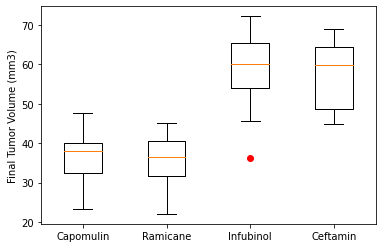

In [402]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
data = [volume_dict[0],volume_dict[1],volume_dict[2],volume_dict[3]]
ax1.boxplot(data,0,'ro',labels=treatments)
plt.show()


## Line and Scatter Plots

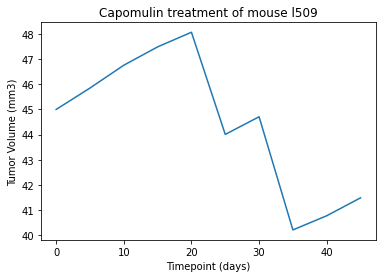

In [403]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Mouse_id = "l509"
timepoints = combined_drop.loc[(combined_drop["Mouse ID"] == Mouse_id) &
                                (combined_drop["Drug Regimen"] == "Capomulin")]
volume_time_plt = plt.plot(timepoints["Timepoint"],timepoints["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {Mouse_id}")
plt.show()


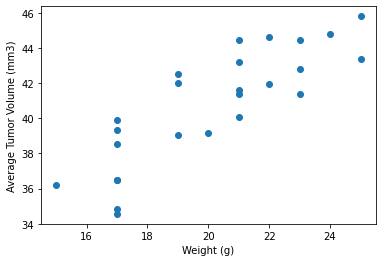

In [404]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mouse = combined_drop.loc[combined_drop["Drug Regimen"] == "Capomulin"]
volume_weight_grp = Capomulin_mouse.groupby(['Weight (g)',"Mouse ID"])["Tumor Volume (mm3)"].mean()
volume_weight_df = volume_weight_grp.reset_index()
x_values = volume_weight_df["Weight (g)"]
y_values = volume_weight_df["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


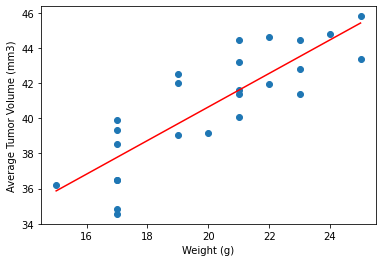

In [405]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()
